<a href="https://colab.research.google.com/github/lucianoh34/RedesNeurais/blob/main/LHR_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte
Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte
Saving train-images.idx3-ubyte to train-images.idx3-ubyte
Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte


Epoch 1/5
844/844 [==============================] - 45s 52ms/step - loss: 0.2014 - accuracy: 0.9390 - val_loss: 0.0630 - val_accuracy: 0.9823
Epoch 2/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0488 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 46s 54ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0294 - accuracy: 0.9911
Test accuracy: 0.991100013256073


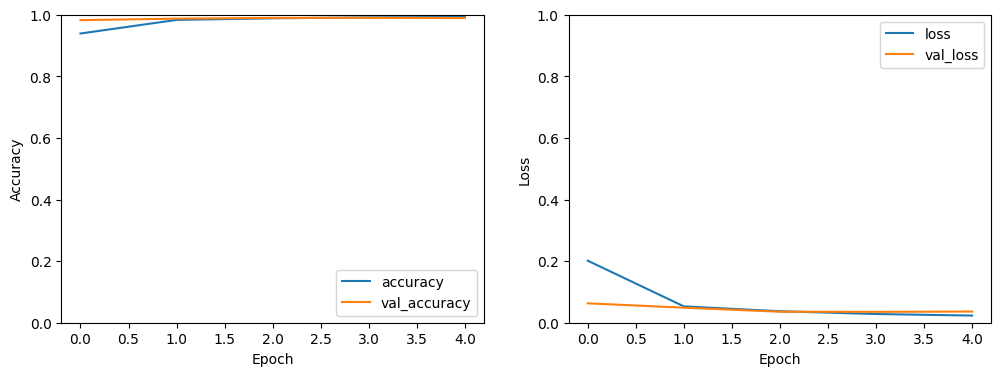

In [6]:
from google.colab import files
import os
import struct
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Função auxiliar para carregar o MNIST
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 28, 28)

    return images, labels

# caminho da pasta
mnist_path = '/content'

# Carregar os dados
train_images, train_labels = load_mnist(mnist_path, kind='train')
test_images, test_labels = load_mnist(mnist_path, kind='t10k')

# Normalizar os dados
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Expandir dimensões para canais de cor
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# One-hot encoding das labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Função para construir a CNN
def build_cnn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

# Construir a CNN
model = build_cnn()

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plotar a precisão e a perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

plt.show()